In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os
import sys
import random
import Levenshtein as Lev
from scipy.special import softmax
import seaborn as sns

sys.path.append('../../')
from common.plot_style_utils import set_pub_plot_context
np.random.seed(42)
random.seed(42)
%matplotlib inline


In [2]:
# AAEL010097-Gene Drive somArchon-GFP and guides payload WHOLE PLASMID annotated
plasmid = "gagaaagcgccacgcttcccgaagggagaaaggcggacaggtatccggtaagcggcagggtcggaacaggagagcgcacgagggagcttccagggggaaacgcctggtatctttatagtcctgtcgggtttcgccacctctgacttgagcgtcgatttttgtgatgctcgtcaggggggcggagcctatggaaaaacgccagcaacgcggcctttttacggttcctggccttttgctggccttttgctcacatgttctttcctgcgttatcccctgattctgtggataaccgtattaccgcctttgagtgagctgataccgctcgccgcagccgaacgaccgagcgcagcgagtcagtgagcgaggaagcggaagagcgcccaatacgcaaaccgcctctccccgcgcgttggccgattcattaatgcagctggcacgacaggtttcccgactggaaagcgggcagtgagcgcaacgcaattaatgtgagttagctcactcattaggcaccccaggctttacactttatgcttccggctcgtatgttgtgtggaattgtgagcggataacaatttcacacaggaaacagctatgacatgattacgaattcgagctcggtacccggggatcctctagagtcgacgctcgcgcgacttggtttgccattctttagcgcgcgtcgcgtcacacagcttggccacaatgtggtttttgtcaaacgaagattctatgacgtgtttaaagtttaggtcgagtaaagcgcaaatcttttttaaccctagaaagatagtctgcgtaaaattgacgcatgcattcttgaaatattgctctctctttctaaatagcgcgaatccgtcgctgtgcatttaggacatctcagtcgccgcttggagctcccgtgaggcgtgcttgtcaatgcggtaagtgtcactgattttgaactataacgaccgcgtgagtcaaaatgacgcatgattatcttttacgtgacttttaagatttaactcatacgataattatattgttatttcatgttctacttacgtgataacttattatatatatattttcttgttatagatatcgtgactaatatataataaaatgggtagttctttagacgatgagcatatcctctctgctcttctgcaaagcgatgacgagcttgttggtgaggattctgacagtgaaatatcagatcacgtaagtgaagatgacgtccagagcgatacagaagaagcgtttatagatgaggtacatgaagtgcagccaacgtcaagcggtagtgaaatattagacgaacaaaatgttattgaacaaccaggttcttcattggcttctaacagaatcttgaccttgccacagaggactattagaggtaagaataaacattgttggtcaacttcaaagtccacgaggcgtagccgagtctctgcactgaacattgtcagatccgagatcggccggcctagaagctttaagatacattgatgagtttggacaaaccacaactagaatgcagtgaaaaaaatgctttatttgtgaaatttgtgatgctattgctttatttgtaaccattataagctgcaataaacaagttaacaacaacaattgcattcattttatgtttcaggttcagggggaggtgtgggaggttttttaaagcaagtaaaacctctacaaatgtggtatggctgattatgatataaccaattattcaaaaaatgacatcattcaatttgaacaaacgttcgatagaaattatatatgatttcacatgatattaaactacgaagaaaattttacataaggaagtggtataaaacgtaatatgcttaataaaaactttaacccttttgggaggataatattcagaagttctgattcagaaccatctctcatgttatgttcgttttttgttgcttgtcctttatatgccacatgaacaataacaccaatatctatcccatttccaggacctaacggaccttgaagcggcgccaaaatgtgtgacgatgatgctggagcactagtcattgacaacggatccggcatgtgtaaggccggtttcgctggtgatgatgccccacgtgccgtcttcccgtccattgtcggccgccctcgccaccagggtgtgatggtcggtatgggtcaaaaagatgcctacgtcggtgatgaagcccaatccaagcgaggtatcctcacgccaccatggtttctatcgcactgcaggctggttatgacctcctcggagatggtagacctgaaagtctgtggctcggaattggtacactgctgatgctgatcggaaccttctacttcctggttagagcgtggggagagactgacaaggatgcacgggagtactacgcagtgacaatcctggtcagcggtattgccagtgcagcttatctgtcaatgttctttggtattggcctcacagaggtgccagtaggtggagagatgctgaacatctactacgcaagatacgcacagtggctgttcactacaccactgttgctgctgcacctggcactcctggccaaagttgatagagtgaccatcggcactctcgttggcgtcgatgctctgatgattgtcacaggcctgataggaacactgtcacatactgccattgccagatactcttggtggctgttctcaactatctgtatgatcgtcgttctgtatgtcctggccacttctctgcggtcagccgctaaggagagaggcccagaggttgcctcaaccttcaacatcctcaccgcactggttctggtcctgtggactgcttaccctatcatctggattatcggcaccgagggtgccggagttgtgggcctgggaatcgaaactttgctgttcatggtgctggacgtcaccgccaaggtgggcttcggttttatcctgctcaggtcaagagccattctgcaagatacagaagcacctgaaccttcagctggagctgataccggtgccgccgaccgcccggtagtagcagtgagcaaggcggccgccaagagcaggatcaccagcgagggcgagtacatccccctggaccagatcgacatcaacgtggtgagcaagggcgaggagctgttcaccggggtggtgcccatcctggtcgagctggacggcgacgtaaacggccacaagttcagcgtgtccggcgagggcgagggcgatgccacctacggcaagctgaccctgaagttcatttgcaccaccggcaagctgcccgtgccctggcccaccctcgtgaccaccctgacctacggcgtgcagtgcttcagccgctaccccgaccacatgaagcagcacgacttcttcaagtccgccatgcccgaaggctacgtccaggagcgcaccatcttcttcaaggacgacggcaactacaagacccgcgccgaggtgaagttcgagggcgacaccctggtgaaccgcatcgagctgaagggcatcgacttcaaggaggacggcaacatcctggggcacaagctggagtacaactacaacagccacaacgtctatatcatggccgacaagcagaagaacggcatcaaggtgaacttcaagatccgccacaacatcgaggacggcagcgtgcagctcgccgaccactaccagcagaacacccccatcggcgacggccccgtgctgctgcccgacaaccactacctgagcacccagtccgccctgagcaaagaccccaacgagaagcgcgatcacatggtcctgctggagttcgtgaccgccgccgggatcactctcggcatggacgagctgtacaagggtgggagcggaggtacccagagccagcctatcctgaacaccaaggagatggcccctcagagcaagcctcctgaggagctggagatgagcagcatgcctagccctgtggcccctctgcctgccaggaccgagggcgtgatcgacatgaggagcatgagcagcatcgacagcttcatcagctgcgccaccgacttccctgaggccaccaggttctacaagttctgctacgagaacgaggtgtaacactttccaaaattcatttggtaatttctacaagaattttttcaagaaatttcttaagaatttttgaaaaaaaaaatggtaatttttactgaattgataaacgcaattgataggtaaaccattgctaaatatagtcattcaccaaacacactgcttttttctcgtctgaaaattttttagttgtttcgcaagtaacccattttatatccaaaaattactttctgtacatttttctcgctctttcttagcgaatggattattgatttctaagcttgtcattgacttgactacttttattgaactgataattctattaacagaaattaataacaacagtttgcttatgaaataacatgatagccaagtcaataacaggtccagtttagactttcgggttttccatagtaaatatactacaaataatattaatgttccatgaaaaaaggagtaagagtctggtaaccctagtgcacgcaaatatctcgcgggcatatttggttgctgaggtatatttatatttgaacgccatgagaaaaagcggaagaaattggctcatggccgattttaaggatatttaaaaattgtacaatgtacatataataggccaggagaagtggatgaacttgtcattcatttttctgtcaattctcatacaaaatctactttttctttgacataaattcactctaggtgaaccacttcccctggcctattaaacatccgttccttcaatgtgttcttttttttaagcgtgtgttaaaagtttgctctgctggtgaattcacgctctacccgttcaggcagcattcatcgaaaagccctatctgctcgcacacatttacaaaatgctgattgcgttgtgtgctgaatgggtcactcgtccgtcactgcttgctgtgtacactgtacagttacgcagtctgtgcatcgctagaatcatatttacggaagagtattatatatacccgatgcgttgctcttcgattGctatgggatatttcagggtgGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTTTTTTTTcatatgtcttgccgaagcacattaacccaagccatttatatatcaagtacaagttgatttgattctagtgatggactgacacgaatctatggcactgttgcagagcttacaaacaggtacccggagtcgcttcaattattcaatcatccattcaaaaacttccatctcttccaattagccaatattcaaattggaatccagccagccgacggaggcagatggtctacctggcaactatagagtttccatgtttccagactttccctcccggtaaacggagacaaaacgacagacgtaagtaggtacatatgcataccgcacggacaaatcaaatttgtctggcagctccaattagagtcgttaaaaatttaacgatgcgctaaataacttcaagctatttgtctcgctggattggcttcgagtggtaagatcctatcaaatgccgaaaacaaaaaactttcttcttaattgttcgttcttcaacacctctccatggtgataacggatacggtttcattgtcagcatccatcctccgaaaaatacattacgccttgaaatatgcaatcgcaaacacggatctgtttggaacatttattttactatgaagagatgcgataggtaatatttatttgagcgtttaagatactcattgttctctcaaagaatgtcattgaaagccaacgaggtcaaatcaaatattataataaaaaggtcaaagaggactaacttaaagctctctttatggataggaaaaaatattttcgcccatcgctagaacttttaccgtttccattgagtatataactaagatgaatgaggctaattgatgaggactcgtatgaaagccaGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTTTTTTTTgtccgataatgtgattcgtacgtgacaggacgcgacccgataaggccggcctacgtgactgccgacacgtacttttttgcactgcaaaaaggttcaatgtgtggtagtgtatttggagcgtatacaacggtgtagactatttatgtaaaatagtctacgaaacgtagagtttgtactatgtatgggcccgcgtgcaaaagcgtgtttttttgcagtgcaaaaaagttggtggtggggaggccaccgagtatgggcgcgccccggccgttaactcgaatcgctatccaagccagctccattgtcggcatcgtgctcattctattgacgctggcagatttggttttggcgctatgggacccgttcggttacaacaacatgtttccgcgcgagtttcccgacgacatgtcgcgcacgttcctgactgcgtactttgagagtttcgacaacaccacgtccagagaaatcatagagtttatgcccgagttcttttcggaaatggtcgaaacggacgatgacgccacgtttgaatctctatttcatttattagattatgtggcatctttagaagttaattccgacggccaaatgttaaacttggaggagggtgatgaaattgaggattttgacgaatctactttggtggggcaagcgttagccactagctcgctatacactcgcatggagtttatgcagtacacgtttaggcaaaacacactattgtctatgaacaaagaaaacaacaattttaatcaaataatcatgggtttatttgcaacaaacacaattgtggcgtttacagcatttgttatacacacagaactcatattttttatatttttcgtaatcttcctaatgatcacattttattacataatcaaagaatcgtacgaatattataaaacaattgatttgttattttaaaaacgattcattctagttaattaactacaggaacaggtggtggcggccctcggtgcgctcgtactgctccacgatggtgtagtcctcgttgtgggaggtgatgtccagcttggagtccacgtagtagtagccgggcagctgcacgggcttcttggccatgtagatggacttgaactccaccaggtagtggccgccgtccttcagcttcagggccttgtggatctcgcccttcagcacgccgtcgcgggggtacaggcgctcggtggaggcctcccagcccatggtcttcttctgcattacggggccgtcggaggggaagttcacgccgatgaacttcaccttgtagatgaagcagccgtcctgcagggaggagtcctgggtcacggtcaccacgccgccgtcctcgaagttcatcacgcgctcccacttgaagccctcggggaaggacagcttcttgtagtcggggatgtcggcggggtgcttcacgtacaccttggagccgtactggaactggggggacaggatgtcccaggcgaagggcagggggccgcccttggtcaccttcagcttcacggtgttgtggccctcgtaggggcggccctcgccctcgccctcgatctcgaactcgtggccgttcacggtgccctccatgcgcaccttgaagcgcatgaactccttgatgacgttcttggaggagcgcaccatagggccgggattctcctccacgtcaccgcatgttagaagacttcctctgccctcctttttcttttttgcctggccggcctttttcgtggccgccggccttttgtcgcctcccagctgagacaggtcgatccgtgtctcgtacaggccggtgatgctctggtggatcagggtggcgtccagcacctctttggtgctggtgtacctcttccggtcgatggtggtgtcaaagtacttgaaggcggcaggggctcccagattggtcagggtaaacaggtggatgatattctcggcctgctctctgatgggcttatcccggtgcttgttgtaggcggacagcactttgtccagattagcgtcggccaggatcactctcttggagaactcgctgatctgctcgatgatctcgtccaggtagtgcttgtgctgttccacaaacagctgtttctgctcattatcctcgggggagcccttcagcttctcatagtggctggccaggtacaggaagttcacatatttggagggcagggccagttcgtttcccttctgcagttcgccggcagaggccagcattctcttccggccgttttccagctcgaacagggagtacttaggcagcttgatgatcaggtcctttttcacttctttgtagcccttggcttccagaaagtcgatgggattcttctcgaagctgcttctttccatgatggtgatccccagcagctctttcacactcttcagtttcttggacttgcccttttccactttggccaccaccagcacagaataggccacggtggggctgtcgaagccgccgtacttcttagggtcccagtccttctttctggcgatcagcttatcgctgttcctcttgggcaggatagactctttgctgaagccgcctgtctgcacctcggtctttttcacgatattcacttggggcatgctcagcactttccgcacggtggcaaaatcccggcccttatcccacacgatctccccggtttcgccgtttgtctcgatcagaggccgcttccggatctcgccgttggccagggtaatctcggtcttgaaaaagttcatgatgttgctgtagaagaagtacttggcggtagccttgccgatttcctgctcgctcttggcgatcatcttccgcacgtcgtacaccttgtagtcgccgtacacgaactcgctttccagcttagggtactttttgatcagggcggttcccacgacggcgttcaggtaggcgtcgtgggcgtggtggtagttgttgatctcgcgcactttgtaaaactggaaatccttccggaaatcggacaccagcttggacttcagggtgatcactttcacttcccggatcagcttgtcattctcgtcgtacttagtgttcatccgggagtccaggatctgtgccacgtgctttgtgatctgccgggtttccaccagctgtctcttgatgaagccggccttatccagttcgctcaggccgcctctctcggccttggtcagattgtcgaactttctctgggtaatcagcttggcgttcagcagctgccgccagtagttcttcatcttcttcacgacctcttcggagggcacgttgtcgctcttgccccggttcttgtcgcttctggtcagcaccttgttgtcgatggagtcgtccttcagaaagctctgaggcacgatatggtccacatcgtagtcggacagccggttgatgtccagttcctggtccacgtacatatcccgcccattctgcaggtagtacaggtacagcttctcgttctgcagctgggtgttttccacggggtgttctttcaggatctggctgcccagctctttgatgccctcttcgatccgcttcattctctcgcggctgttcttctgtcccttctgggtggtctggttctctctggccatttcgatcacgatgttctcgggcttgtgccggcccatcactttcacgagctcgtccaccaccttcactgtctgcaggatgcccttcttaatggcggggctgccggccagattggcaatgtgctcgtgcaggctatcgccctggccggacacctgggctttctggatgtcctctttaaaggtcaggctgtcgtcgtggatcagctgcatgaagtttctgttggcgaagccgtcggacttcaggaaatccaggattgtcttgccggactgcttgtcccggatgccgttgatcagcttccggctcagcctgccccagccggtgtatctccgccgcttcagctgcttcatcactttgtcgtcgaacaggtgggcataggttttcagccgttcctcgatcatctctctgtcctcaaacagtgtcagggtcagcacgatatcttccagaatgtcctcgttttcctcattgtccaggaagtccttgtccttgataattttcagcagatcgtggtatgtgcccagggaggcgttgaaccgatcttccacgccggagatttccacggagtcgaagcactcgattttcttgaagtagtcctctttcagctgcttcacggtcactttccggttggtcttgaacagcaggtccacgatggcctttttctgctcgccgctcaggaaggcgggctttctcattccctcggtcacgtatttcactttggtcagctcgttatacacggtgaagtactcgtacagcaggctgtgcttgggcagcaccttctcgttgggcaggttcttatcgaagttggtcatccgctcgatgaagctctgggcggaagcgcccttgtccaccacttcctcgaagttccagggggtgatggtttcctcgctctttctggtcatccaggcgaatctgctgtttcccctggccagagggcccacgtagtaggggatgcggaaggtcaggatcttctcgatcttttcccggttgtccttcaggaatgggtaaaaatcttcctgccgccgcagaatggcgtgcagctctcccaggtggatctggtgggggatgctgccgttgtcgaaggtccgctgcttccgcagcaggtcctctctgttcagcttcacgagcagttcctcggtgccgtccatcttttccaggatgggcttgatgaacttgtagaactcttcctggctggctccgccgtcaatgtagccggcgtagccgttcttgctctggtcgaagaaaatctctttgtacttctcaggcagctgctgccgcacgagagctttcagcagggtcaggtcctggtggtgctcgtcgtatctcttgatcatagaggcgctcaggggggccttggtgatctcggtgttcactctcaggatgtcgctcagcaggatggcgtcggacaggttcttggcggccagaaacaggtcggcgtactggtcgccgatctgggccagcaggttgtccaggtcgtcgtcgtaggtgtccttgctcagctgcagtttggcatcctcggccaggtcgaagttgctcttgaagttgggggtcaggcccaggctcagggcaatcaggtttccgaacaggccattcttcttctcgccgggcagctgggcgatcagattttccagccgtctgctcttgctcagtctggcagacaggatggccttggcgtccacgccgctggcgttgatggggttttcctcgaacagctggttgtaggtctgcaccagctggatgaacagcttgtccacgtcgctgttgtcggggttcaggtcgccctcgatcaggaagtggccccggaacttgatcatgtgggccagggccagatagatcagccgcaggtcggccttgtcggtgctgtccaccagtttctttctcaggtggtagatggtggggtacttctcgtggtaggccacctcgtccacgatgttgccgaagatggggtgccgctcgtgcttcttatcctcttccaccaggaaggactcttccagtctgtggaagaagctgtcgtccaccttggccatctcgttgctgaagatctcttgcagatagcagatccggttcttccgtctggtgtatcttcttctggcggttctcttcagccgggtggcctcggctgtttcgccgctgtcgaacagcagggctccgatcaggttcttcttgatgctgtgccggtcggtgttgcccagcaccttgaatttcttgctgggcaccttgtactcgtcggtgatcacggcccagcccacagagttggtgccgatgtccaggccgatgctgtacttcttgtcggctgctgggactccgtggataccgaccttccgcttcttctttggggccatcttatcgtcatcgtctttgtaatcaatatcatgatccttgtagtctccgtcgtggtccttatagtccatctcgagtttcactctgtagacaaaagataacctcttttatcccagcaacctgcttttcctccgaaaaggaaaattccacaaaatggtcacatggtggaaaaaagaacgacacttaccaatactctttcgaagaaattcgcaattttcacacaggttttaatcactgttttcacgcacgcttttagcgacccgtttgtgttttagattttcacttttgaggatattccacagaacacttttctgaaactttccttatttttcttccaacgcggcgatgctcgtccttggcttgatgaacttgaagtgaaggttggcaaggtcgatctggtctacagcaaaaaaaaaattcggacgaaacgggagcaaaattccgttagtgtcggtgcggtactagaatgagttacagttgattacgtgcgggcagtgccgggttttgtggaatatccggcggagaaattcgaatattagattaaatgtgaccattgatggaagtgaaaatttatactcgatgcggtattattggaatatttgagatgccaatggaatatattgcaagaaatgcgaaaaatgtcgaccgttaatatttttttaatcatgcactcaccactaccagacagggatgccaggtaatttatttttatgtattgatttcaatgcacggaaaagtgtcatccaatgttttccaccttaaatttttcaaaaataacactgcggacctttttttcgcctcaagcatcaaaatatctatatttacttaaggctaagtagcccgtcattcgttttggcaacaatgatgacctttcagcttgcatttcaaagtgataaaactcagtcttgatagtttatattgacttgaaaaagtatctctttacgcactaagatgcataaagtatgctgtatgctgatactttttcagctgtgtcagtgcaaaaccaactgattttctttgattcgaaatcgtgagatgagttagggcccattcacaaatttcataacgctagagggggtgggtagcgatgttacggcccatacaaaaattgaataacattcatacaaaaagcgttacaagggggtgggtgggtgcccaaaatacgcttccaatcgcaaaacgcaacatactgttagccatctatactttggtagcgcaactagtcagatgatgagagatttgatttttcacgcatccatcacatgccgctgtggggaaaaatgttttattttcctgatataagacggttcacagtgaaacagttaggcggaaaaggtaggaatgtccattctctatgttctacatacgtttgtttttttgtattattgcactacttttataaaaattgagatccggctggtaggagcactagtttgaggttggaaaaccaggatatgtgaggttagattcattggaactttcgcctgagcgatttttgcgcttgaataaaacacgcttcggaacattctccgctgcccctaaaaataccattgggtagataaatgaattctctaccattggatctcattcaatttcatacataagtgaagtaagcggtgaaaataaatattttgttccgaatgttttgaaaccatgaatgagtttgacattgctctcgtcaaccatcatcatgacgacagcagcacaccccaccggacgaattgtcgtattgggagcgaatggccaatttcagcgttatgaaataaatgaatgaacccttagcaacaatcatcaacgacgcgtacaaatttcaatgacggcctacttcgccttaatttagggttgtcgttttataaattgtataagccattttacgagacgtttcggaacagctgatcgccgaaacggcgtcaattgacaggaggcctgggattaaatccagcgtgatttttaacaacgcctcatcttaccaaacgaggacatgaagaaaatgacaaaaaagagatccaaaaatgtttgttactgcaacttaacacctagttattgtatcagctacctctttttcacctatatttcacataaaaaggcatttttgtgatcagaaatattttaatattttttctccatttaagttttcgcctgtataaaaagctacgcttgaaatgcgcacagtcatcaaccatcatcatcgccataactgacgacgccagggaagaaaccatcattcaccttgcagcaaataggaaaaaaaacggacatcttcaacaaacaaaagcccatgcgctaacttggtttaggagtttagtgtgacaccatgaccccgctgatgatctttacttagcacaccataaccacctttatgcgttcgttcatccaaaatctacaggatatcactgcagccgcgagaagaactcgtgaaccatcctgttttcttttttattatattcttacttttaacttcaaattattttcagtaataaaacgtctcaaaataataagttcataatgagtttaattttacggaataagaacaaccatttaagttattaaatccttagatttaatggaattagattgattatatggaacccagacttggtaaaaaataaactccacgttaaatttctttctgagacttaaaattctttcgggaaagctgggagcaattctcgctaaggagtcgtccacaaattatgaaacgctttagcggccgcgtcgacatgcccgccgtgaccgtcgagaacccgctgacgctgccccgcgtatccgcacccgccgacgccgtcgcacgtcccgtgctcaccgtgaccaccgcgcccagcggtttcgagggcgagggcttcccggtgcgccgcgcgttcgccgggatcaactaccgccacctcgacccgttcatcatgatggaccagatgggtgaggtggagtacgcgcccggggagcccaagggcacgccctggcacccgcaccgcggcttcgagaccgtgacctacatcgtcgacctaggaccccgggcgagctcgaattaaccattgtgggaaccgtgcgatcaaacaaacgcgagataccggaagtactgaaaaacagtcgctccaggccagtgggaacatcgatgttttgttttgacggaccccttactctcgtctcatataaaccgaagccagctaagatggtatacttattatcatcttgtgatgaggatgcttctatcaacgaaagtaccggtaaaccgcaaatggttatgtattataatcaaactaaaggcggagtggacacgctagaccaaatgtgttctgtgatgacctgcagtaggaagacgaataggtggcctatggcattattgtacggaatgataaacattgcctgcataaattcttttattatatacagccataatgtcagtagcaagggagaaaaggttcaaagtcgcaaaaaatttatgagaaacctttacatgagcctgacgtcatcgtttatgcgtaagcgtttagaagctcctactttgaagagatatttgcgcgataatatctctaatattttgccaaatgaagtgcctggtacatcagatgacagtactgaagagccagtaatgaaaaaacgtacttactgtacttactgcccctctaaaataaggcgaaaggcaaatgcatcgtgcaaaaaatgcaaaaaagttatttgtcgagagcataatattgatatgtgccaaagttgtttctgactgactaataagtataatttgtttctattatgtataagttaagctaattacttattttataatacaacatgactgtttttaaagtacaaaataagtttatttttgtaaaagagagaatgtttaaaagttttgttactttatagaagaaattttgagtttttgtttttttttaataaataaataaacataaataaattgtttgttgaatttattattagtatgtaagtgtaaatataataaaacttaatatctattcaaattaataaataaacctcgatatacagaccgataaaacacatgcgtcaattttacgcatgattatctttaacgtacgtcacaatatgattatctttctagggttaaataatagtttctaatttttttattattcagcctgctgtcgtgaataccgtatatctcaacgctgtctgtgagattgtcgtattctagcctttttagtttttcgctcatcgacttgatattgtccgacacattttcgtcgatttgcgttttgatcaaagacttgagcagagacacgttaatcaactgttcaaattgatccatattaacgatatcaacccgatgcgtatatggtgcgtaaaatatattttttaaccctcttatactttgcactctgcgttaatacgcgttcgtgtacagacgtaatcatgttttcttttttggataaaactcctactgagtttgacctcatattagaccctcacaagttgcaaaacgtggcattttttaccaatgaagaatttaaagttattttaaaaaatttcatcacagatttaaagaagaaccaaaaattaaattatttcaacagtttaatcgaccagttaatcaacgtgtacacagacgcgtcggcaaaaaacacgcagcccgacgtgttggctaaaattattaaatcaacttgtgttatagtcacggatttgccgtccaacgtgttcctcaaaaagttgaagaccaacaagtttacggacactattaattatttgattttgccccacttcattttgtgggatcacaattttgttatatttttaaacaaagcttggcactggccgtcgttttacaacgtcgtgactgggaaaaccctggcgttacccaacttaatcgccttgcagcacatccccctttcgccagctggcgtaatagcgaagaggcccgcaccgatcgcccttcccaacagttgcgcagcctgaatggcgaatggcgcctgatgcggtattttctccttacgcatctgtgcggtatttcacaccgcatatggtgcactctcagtacaatctgctctgatgccgcatagttaagccagccccgacacccgccaacacccgctgacgcgccctgacgggcttgtctgctcccggcatccgcttacagacaagctgtgaccgtctccgggagctgcatgtgtcagaggttttcaccgtcatcaccgaaacgcgcgagacgaaagggcctcgtgatacgcctatttttataggttaatgtcatgataataatggtttcttagacgtcaggtggcacttttcggggaaatgtgcgcggaacccctatttgtttatttttctaaatacattcaaatatgtatccgctcatgagacaataaccctgataaatgcttcaataatattgaaaaaggaagagtatgagtattcaacatttccgtgtcgcccttattcccttttttgcggcattttgccttcctgtttttgctcacccagaaacgctggtgaaagtaaaagatgctgaagatcagttgggtgcacgagtgggttacatcgaactggatctcaacagcggtaagatccttgagagttttcgccccgaagaacgttttccaatgatgagcacttttaaagttctgctatgtggcgcggtattatcccgtattgacgccgggcaagagcaactcggtcgccgcatacactattctcagaatgacttggttgagtactcaccagtcacagaaaagcatcttacggatggcatgacagtaagagaattatgcagtgctgccataaccatgagtgataacactgcggccaacttacttctgacaacgatcggaggaccgaaggagctaaccgcttttttgcacaacatgggggatcatgtaactcgccttgatcgttgggaaccggagctgaatgaagccataccaaacgacgagcgtgacaccacgatgcctgtagcaatggcaacaacgttgcgcaaactattaactggcgaactacttactctagcttcccggcaacaattaatagactggatggaggcggataaagttgcaggaccacttctgcgctcggcccttccggctggctggtttattgctgataaatctggagccggtgagcgtgggtctcgcggtatcattgcagcactggggccagatggtaagccctcccgtatcgtagttatctacacgacggggagtcaggcaactatggatgaacgaaatagacagatcgctgagataggtgcctcactgattaagcattggtaactgtcagaccaagtttactcatatatactttagattgatttaaaacttcatttttaatttaaaaggatctaggtgaagatcctttttgataatctcatgaccaaaatcccttaacgtgagttttcgttccactgagcgtcagaccccgtagaaaagatcaaaggatcttcttgagatcctttttttctgcgcgtaatctgctgcttgcaaacaaaaaaaccaccgctaccagcggtggtttgtttgccggatcaagagctaccaactctttttccgaaggtaactggcttcagcagagcgcagataccaaatactgttcttctagtgtagccgtagttaggccaccacttcaagaactctgtagcaccgcctacatacctcgctctgctaatcctgttaccagtggctgctgccagtggcgataagtcgtgtcttaccgggttggactcaagacgatagttaccggataaggcgcagcggtcgggctgaacggggggttcgtgcacacagcccagcttggagcgaacgacctacaccgaactgagatacctacagcgtgagctat"
plasmid = plasmid.upper()

In [3]:
# With temp scaling param
logits = np.load('../../../data/deteRNNt_exploration/true_genedrive_akbari_SomArchon_scanning_subsequence_logits.npy') / 1.7226
logits.shape

(129120, 1314)

In [4]:
probs = softmax(logits, axis=1)

In [5]:
low_to_high = np.argsort(probs, axis=1)

In [6]:
low_to_high[:,-10:]

array([[ 675, 1200, 1205, ...,  890,  895, 1313],
       [ 104,   31,  861, ...,  890, 1313,  828],
       [1163,   45, 1089, ...,  895,  890, 1313],
       ...,
       [1000,   86,  222, ...,  792,  864, 1023],
       [ 637,  674,   27, ...,  578,  142, 1313],
       [ 235,  940,  753, ...,  222,   86, 1275]])

In [7]:
(low_to_high[:,-1] == 288).sum()

203

In [8]:
(low_to_high[:,-1] == 895).sum()

195

In [9]:
window_info = pickle.load(open('../../../data/deteRNNt_exploration/true_genedrive_akbari_SomArchon_scanning_subsequence_window_info.pkl', 'rb'))

In [10]:
window_info

,window_start,window_end
0,0,1024
1,1,1025
2,2,1026
3,3,1027
4,4,1028
5,5,1029
6,6,1030
7,7,1031
8,8,1032
9,9,1033


In [11]:
window_info['size'] = window_info.apply(lambda row: row[1] -row[0], axis=1)

In [12]:
window_info

,window_start,window_end,size
0,0,1024,1024
1,1,1025,1024
2,2,1026,1024
3,3,1027,1024
4,4,1028,1024
5,5,1029,1024
6,6,1030,1024
7,7,1031,1024
8,8,1032,1024
9,9,1033,1024


In [13]:
window_info['size'].value_counts()

16      18720
32      18704
64      18672
128     18608
256     18480
512     18224
1024    17712
Name: size, dtype: int64

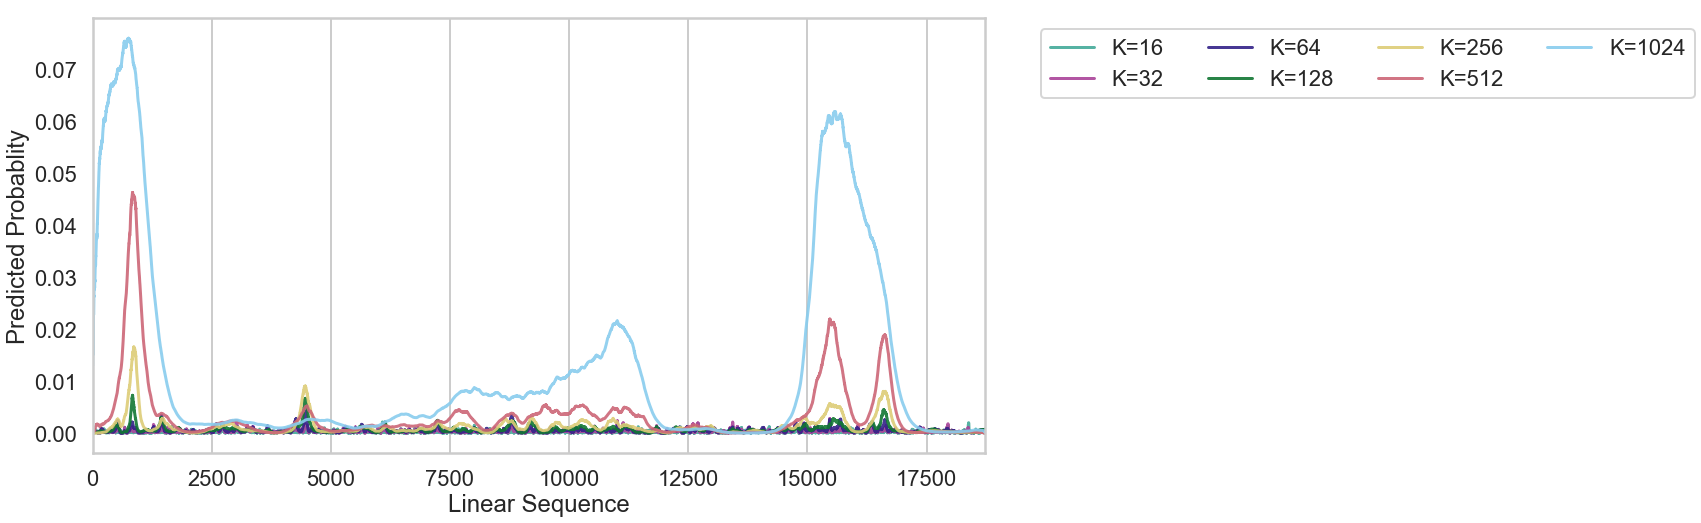

In [14]:
# Plot akbari subsequences
set_pub_plot_context(context='poster')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))
for j, window_size in enumerate(reversed(window_info['size'].unique())):
    window = window_info[window_info['size'] == window_size]
    window_logits = logits[window.index.values]

    bp_probs = []
    size_of_average = []
    for i in range(len(plasmid)):
        # select all subsequences which include this position
        bp_logits = window_logits[ (i >= window['window_start']) & (i <= window['window_end'])]
        size_of_average.append(len(bp_logits))
        bp_probs.append(softmax(np.mean(bp_logits, axis=0)))
        
    bp_probs = np.array(bp_probs)

    akbari = bp_probs[:, 895]
    pal = sns.color_palette()
    ax.plot(np.arange(len(plasmid)), akbari, 
            label=f"K={window_size}", alpha=.9, color=pal[6-j],) #alpha=np.log(window_size) / np.log(1024), linewidth=5)
    
ax.set_xlim(0, len(plasmid))    
ax.set_xlabel('Linear Sequence')
ax.set_ylabel('Predicted Probablity')
#ax.set_yscale('log')
ax.yaxis.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)

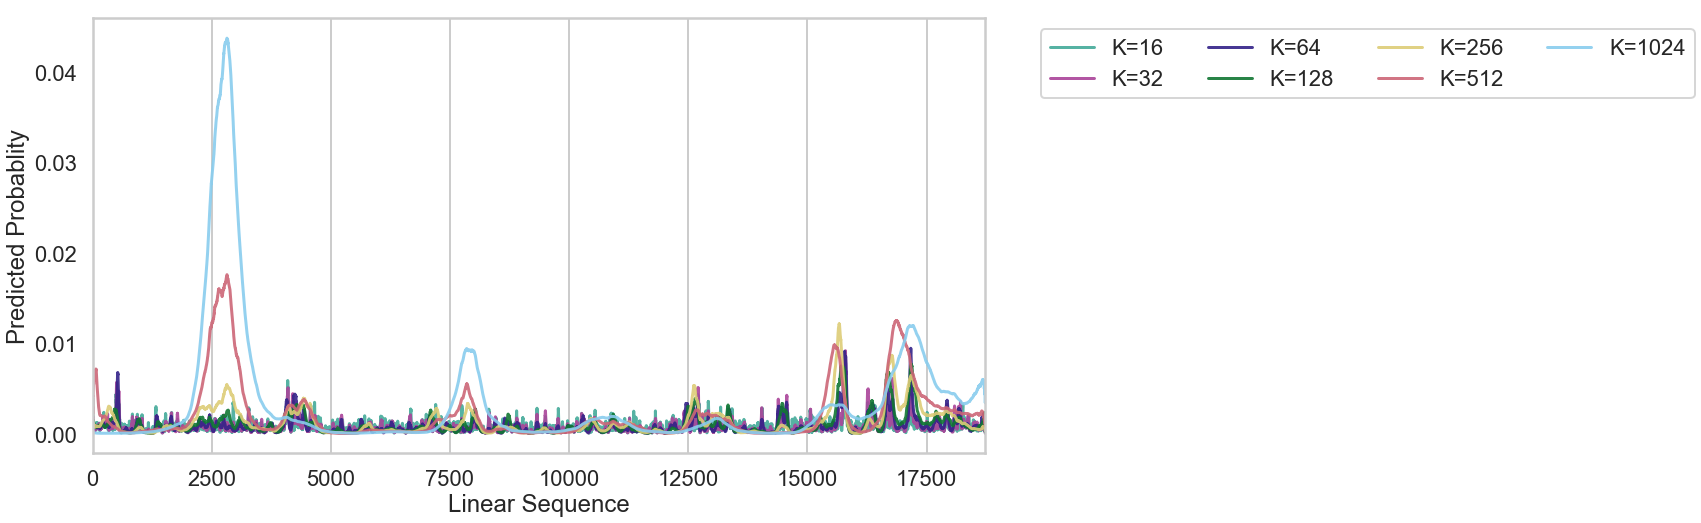

In [15]:
# And boyden subsequences
set_pub_plot_context(context='poster')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))
for j, window_size in enumerate(reversed(window_info['size'].unique())):
    window = window_info[window_info['size'] == window_size]
    window_logits = logits[window.index.values]

    bp_probs = []
    size_of_average = []
    for i in range(len(plasmid)):
        # select all subsequences which include this position
        bp_logits = window_logits[ (i >= window['window_start']) & (i <= window['window_end'])]
        size_of_average.append(len(bp_logits))
        bp_probs.append(softmax(np.mean(bp_logits, axis=0)))
        
    bp_probs = np.array(bp_probs)

    boyden = bp_probs[:, 288]
    pal = sns.color_palette()
    ax.plot(np.arange(len(plasmid)), boyden, 
            label=f"K={window_size}", alpha=.9, color=pal[6-j],) 
    
ax.set_xlim(0, len(plasmid))    
ax.set_xlabel('Linear Sequence')
ax.set_ylabel('Predicted Probablity')
#ax.set_yscale('log')
ax.yaxis.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)

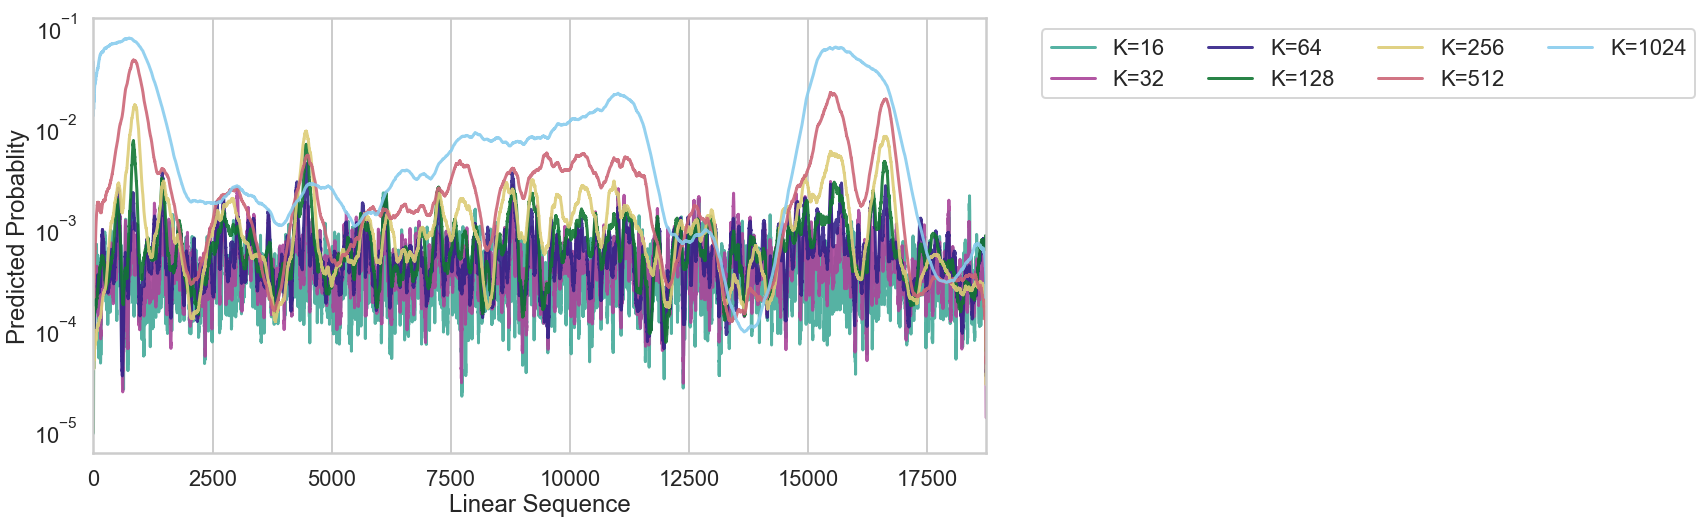

In [16]:
set_pub_plot_context(context='poster')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))
for j, window_size in enumerate(reversed(window_info['size'].unique())):
    window = window_info[window_info['size'] == window_size]
    window_logits = logits[window.index.values]

    bp_probs = []
    size_of_average = []
    for i in range(len(plasmid)):
        # select all subsequences which include this position
        bp_logits = window_logits[ (i >= window['window_start']) & (i <= window['window_end'])]
        size_of_average.append(len(bp_logits))
        bp_probs.append(softmax(np.mean(bp_logits, axis=0)))
        
    bp_probs = np.array(bp_probs)

    akbari = bp_probs[:, 895]
    pal = sns.color_palette()
    ax.plot(np.arange(len(plasmid)), akbari, 
            label=f"K={window_size}", alpha=.9, color=pal[6-j],) #alpha=np.log(window_size) / np.log(1024), linewidth=5)
    
ax.set_xlim(0, len(plasmid))    
ax.set_xlabel('Linear Sequence')
ax.set_ylabel('Predicted Probablity')
ax.set_yscale('log')
ax.yaxis.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)

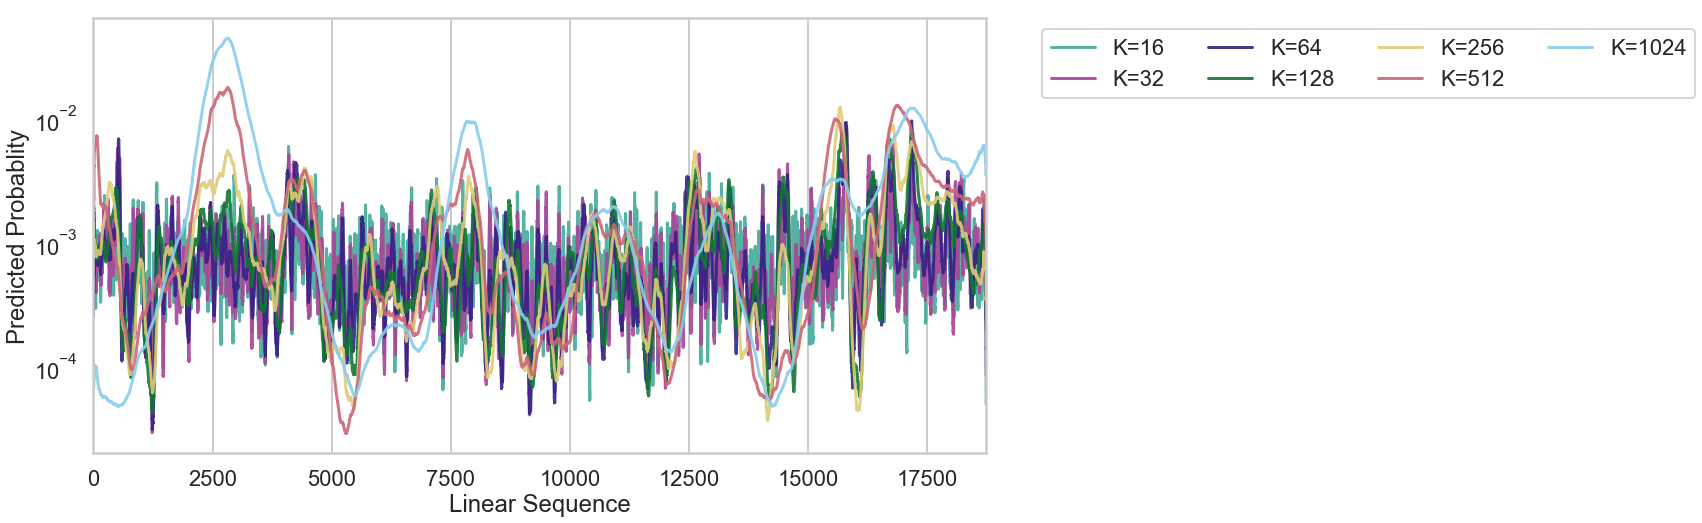

In [17]:
# Ok, so I have to average the window in order to get something over the linear sequence
set_pub_plot_context(context='poster')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))
for j, window_size in enumerate(reversed(window_info['size'].unique())):
    window = window_info[window_info['size'] == window_size]
    window_logits = logits[window.index.values]

    bp_probs = []
    size_of_average = []
    for i in range(len(plasmid)):
        # select all subsequences which include this position
        bp_logits = window_logits[ (i >= window['window_start']) & (i <= window['window_end'])]
        size_of_average.append(len(bp_logits))
        bp_probs.append(softmax(np.mean(bp_logits, axis=0)))
        
    bp_probs = np.array(bp_probs)

    boyden = bp_probs[:, 288]
    pal = sns.color_palette()
    ax.plot(np.arange(len(plasmid)), boyden, 
            label=f"K={window_size}", alpha=.9, color=pal[6-j],) #alpha=np.log(window_size) / np.log(1024), linewidth=5)
    
ax.set_xlim(0, len(plasmid))    
ax.set_xlabel('Linear Sequence')
ax.set_ylabel('Predicted Probablity')
ax.set_yscale('log')
ax.yaxis.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)

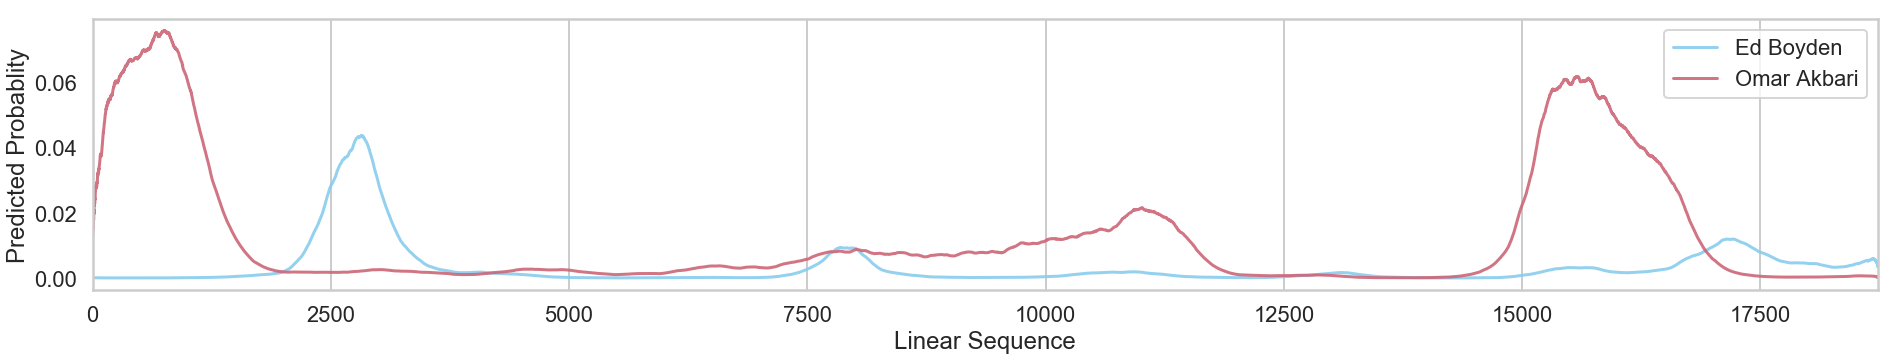

In [18]:
# Ok, so I have to average the window in order to get something over the linear sequence
set_pub_plot_context(context='poster')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(32,5))

window_size = 1024

window = window_info[window_info['size'] == window_size]
window_logits = logits[window.index.values]

bp_probs = []
size_of_average = []
for i in range(len(plasmid)):
    # select all subsequences which include this position
    bp_logits = window_logits[ (i >= window['window_start']) & (i <= window['window_end'])]
    size_of_average.append(len(bp_logits))
    bp_probs.append(softmax(np.mean(bp_logits, axis=0)))
        
bp_probs = np.array(bp_probs)

boyden = bp_probs[:, 288]

pal = sns.color_palette()
ax.plot(np.arange(len(plasmid)), boyden, 
            label=f"Ed Boyden", alpha=.9, color=pal[0],) #alpha=np.log(window_size) / np.log(1024), linewidth=5)
ax.plot(np.arange(len(plasmid)), akbari, 
            label=f"Omar Akbari", alpha=.9, color=pal[1],)

ax.set_xlim(0, len(plasmid))    
ax.set_xlabel('Linear Sequence')
ax.set_ylabel('Predicted Probablity')
#ax.set_yscale('log')
ax.yaxis.grid(False)
ax.legend(loc='best')